In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


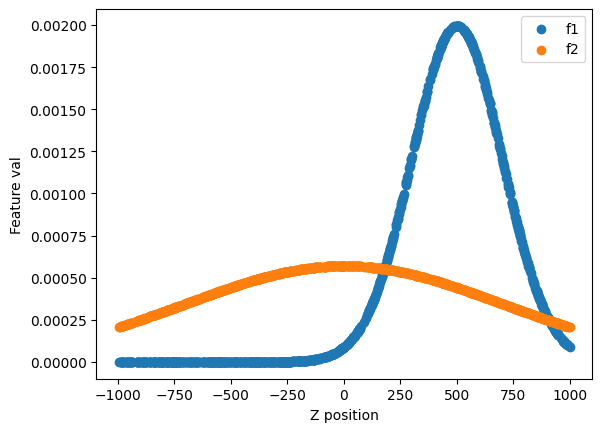

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(mu, sig):
    return lambda x: (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

def func(x, bias):
    m = 2
    
    return (x*m) + bias


n_datapoints = 1000

z_range = 1000
z_vals = np.random.uniform(-z_range, z_range, size=n_datapoints)

f1_gauss = gaussian(500, 200)
f2_gauss = gaussian(0, 700)

# f1 = z_vals * -0.5 
# f2 = z_vals * 2 

f1 = f1_gauss(z_vals)
f2 = f2_gauss(z_vals)


plt.scatter(z_vals, f1, label='f1')
plt.scatter(z_vals, f2, label='f2')
plt.ylabel('Feature val')
plt.xlabel('Z position')
plt.legend()
plt.show()


X = np.stack((f1, f2), axis=1)
y = z_vals

/home/miguel/Projects/uni/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/miguel/Projects/uni/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


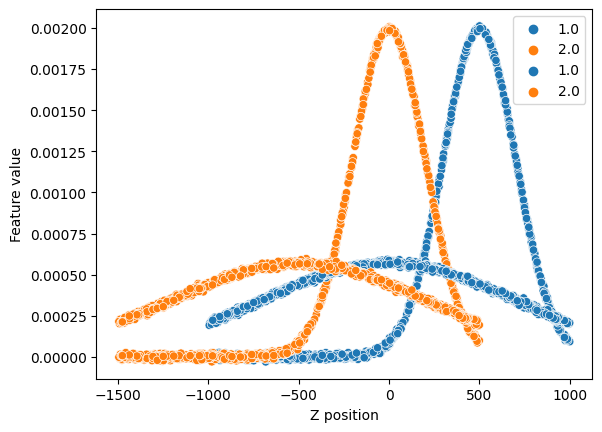

In [3]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


groups = np.zeros((n_datapoints*2, 1))
groups[0:n_datapoints] = 1
groups[n_datapoints:] = 2
groups = groups.astype(str)

onehot_groups = OneHotEncoder().fit_transform(groups)

X2 = X.copy()
X = X + np.random.normal(0, 1e-5, size=X.shape)
X2 = X2 + np.random.normal(0, 1e-5, size=X2.shape)

offset2 = -500
X = np.concatenate((X, X2), axis=0)
y = np.concatenate((y, y+offset2), axis=0)

sns.scatterplot(y, X[:, 0], hue=groups.squeeze())
sns.scatterplot(y, X[:, 1], hue=groups.squeeze())
plt.xlabel('Z position')
plt.ylabel('Feature value')
plt.legend()
plt.show()


In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(groups)

In [5]:
SEED = 42

In [6]:
from sklearn.model_selection import train_test_split
# Without groups informed

idx = np.arange(X.shape[0])

train_idx, test_idx = train_test_split(idx, test_size=0.2, random_state=SEED, stratify=groups)
X_train = X[train_idx]
y_train = y[train_idx]
groups_train = groups[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]
groups_test = groups[test_idx]

In [7]:
print(X_train.shape, y_train.shape, groups_train.shape)

(1600, 2) (1600,) (1600, 1)


In [8]:
groups_train_onehot = encoder.transform(groups_train)
groups_test_onehot = encoder.transform(groups_test)

print(groups_test_onehot.shape)

(400, 2)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

out_scaler = StandardScaler()
y_train_scaled = out_scaler.fit_transform(y_train[:, np.newaxis])
y_test_scaled = out_scaler.transform(y_test[:, np.newaxis])

2023-09-06 15:00:13.281122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 15:00:13.838752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 25)           75          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 25)           650         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 25)           650         ['dense_1[0][0]']                
                                                                                              

2023-09-06 15:00:14.532403: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-09-06 15:00:14.532423: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: ma-mdb119
2023-09-06 15:00:14.532427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: ma-mdb119
2023-09-06 15:00:14.532484: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2023-09-06 15:00:14.532497: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2023-09-06 15:00:14.532501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


2023-09-06 15:00:14.703309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [1600,1]
	 [[{{node Placeholder/_2}}]]
2023-09-06 15:00:14.703547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [1600,1]
	 [[{{node Placeholder/_2}}]]
2023-09-06 15:00:15.373006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [400


Epoch 817: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 842: ReduceLROnPlateau reducing learning rate to 1e-06.



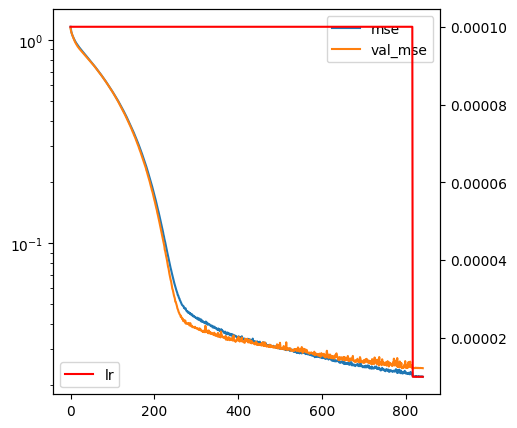

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
from tqdm.keras import TqdmCallback
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

feat_input = Input((X_train.shape[1],))

x = feat_input
for n in [25, 25, 25, 1]:
    x = Dense(n, activation='relu' if n!=1 else 'linear')(x)

group_input = Input((groups_train_onehot.shape[1],))
group_layer = Dense(1, use_bias=False)

group_x = group_layer(group_input)

x += group_x

model = Model(inputs=(feat_input, group_input), outputs=x)
print(model.summary())


batch_size = 2000
epochs = 5000
lr = 0.0001

model.compile(loss='mean_squared_error', optimizer=optimizers.AdamW(learning_rate=lr), metrics=['mean_absolute_error'])

callbacks = [
    ReduceLROnPlateau(monitor='val_mean_absolute_error', factor=0.1,
                      patience=25, verbose=True, mode='min', min_delta=1e-5, min_lr=1e-6,),
    TqdmCallback(verbose=0),
    EarlyStopping(monitor='val_mean_absolute_error', patience=50,
                  verbose=False, min_delta=1e-5, restore_best_weights=True),
]
history = model.fit((X_train_scaled, groups_train_onehot), y_train_scaled, validation_data=((X_test_scaled, groups_test_onehot), y_test_scaled), epochs=epochs, verbose=False, callbacks=callbacks)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]
fig, ax1 = plt.subplots()
plt.yscale('log')
ax1.plot(history.history['mean_absolute_error'], label='mse')
ax1.plot(history.history['val_mean_absolute_error'], label='val_mse')
# ax1.set_ylim([0, 500])
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(history.history['lr'], label='lr', color='red')
ax2.legend(loc=0)
plt.show()

(400, 2)
(400, 2)
13/13 [==============================] - 0s 539us/step
15.170204557495145
(400,)
(400,)
(400, 1)


/home/miguel/Projects/uni/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


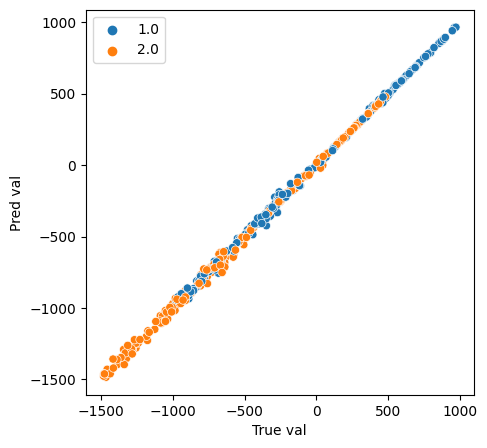

In [11]:
print(X_test_scaled.shape)
print(groups_test_onehot.shape)
# tmp = np.zeros(groups_test_onehot.shape)
pred = model.predict((X_test_scaled, groups_test_onehot.toarray()))
y_pred = out_scaler.inverse_transform(pred).squeeze()
print(mean_absolute_error(y_test, y_pred))

print(y_test.shape)
print(y_pred.shape)
print(groups_test.shape)
sns.scatterplot(y_test, y_pred, hue=groups_test.squeeze())
# sns.lineplot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('True val')
plt.ylabel('Pred val')
plt.show()

# sns.scatterplot(y_train, X_train[:, 0], hue=X_train[:, 2].astype(str))
# plt.ylabel('Input (feature 1)')
# plt.xlabel('Target')
# plt.show()

# sns.scatterplot(y_train, X_train[:, 1], hue=X_train[:, 2].astype(str))
# plt.ylabel('Input (feature 2)')
# plt.xlabel('Target')
# plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# With groups informed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

model = MLPRegressor(hidden_layer_sizes=(25 ,25, 25))

scaler = StandardScaler()

X_train[:, [0,1]] = scaler.fit_transform(X_train[:, [0,1]])
X_test[:, [0,1]] = scaler.transform(X_test[:, [0,1]])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

sns.scatterplot(y_test, y_pred, hue=X_test[:, 2].astype(str))
sns.lineplot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('True val')
plt.ylabel('Pred val')
plt.show()

sns.scatterplot(y_train, X_train[:, 0], hue=X_train[:, 2].astype(str))
plt.ylabel('Input (feature 1)')
plt.xlabel('Target')
plt.show()

sns.scatterplot(y_train, X_train[:, 1], hue=X_train[:, 2].astype(str))
plt.ylabel('Input (feature 2)')
plt.xlabel('Target')
plt.show()

/home/miguel/Projects/uni/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


262.76600314657577


IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
# Inference without groups
z_range = 1000
z_vals = np.random.uniform(-z_range, z_range, size=n_datapoints)

f1_gauss = gaussian(500, 200)
f2_gauss = gaussian(0, 700)

# f1 = z_vals * -0.5 
# f2 = z_vals * 2 

f1 = f1_gauss(z_vals)
f2 = f2_gauss(z_vals)


plt.scatter(z_vals, f1, label='f1')
plt.scatter(z_vals, f2, label='f2')
plt.ylabel('Feature val')
plt.xlabel('Z position')
plt.legend()
plt.show()


test2_X = np.stack((f1, f2), axis=1)
test2_y = z_vals

test2_X = np.concatenate((test2_X, np.zeros(test2_X.shape)), axis=1)
test2_X[:, 3] = 1

test2_X[:, [0, 1]] = scaler.transform(test2_X[:, [0, 1]])

y_pred = model.predict(test2_X)
plt.scatter(test2_y, y_pred)

plt.plot([-2000, 2000], [-2000, 2000])
plt.show()



In [ ]:
model.coefs_[0]